In [327]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
# 1. 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows
# plt.rc('font', family='AppleGothic')  # Mac
# plt.rc('font', family='NanumGothic')  # Linux

# 2. 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = True

# 붓꽃 데이터 시각화

In [197]:
df = sns.load_dataset('iris')
display(df.head(5), df.shape)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

In [199]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: xlabel='petal_length', ylabel='Count'>

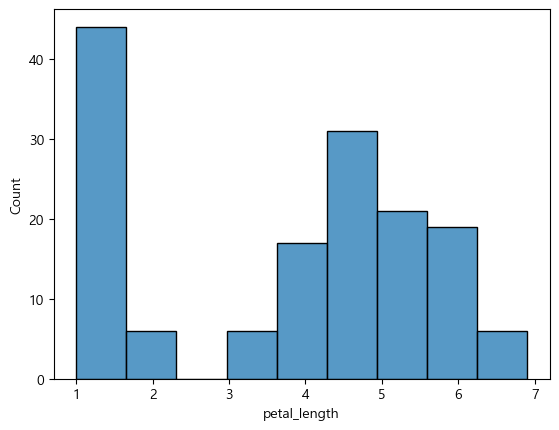

In [201]:
# 히스토그램
sns.histplot(data=df, 
             x='petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

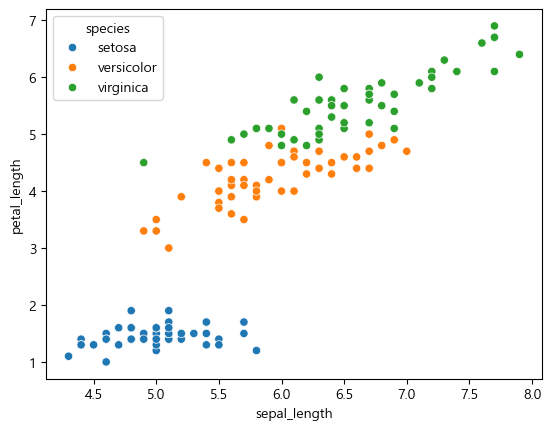

In [203]:
# 스캐터플롯
sns.scatterplot(data=df, 
                x='sepal_length', 
                y='petal_length', 
                hue='species')

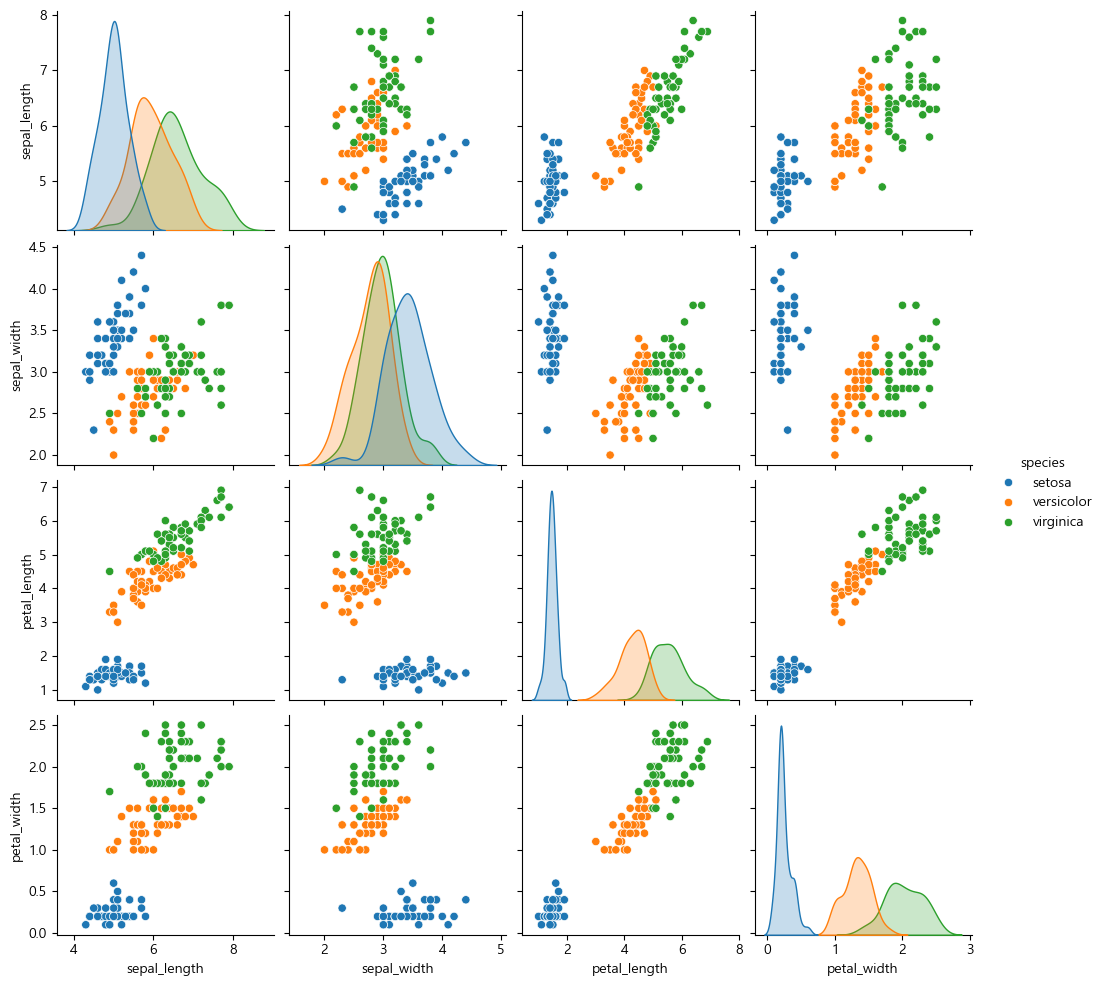

In [205]:
# pairplot
sns.pairplot(df, hue='species')

# 데이터셋 준비

In [207]:
# 라벨 인코딩 
# df['species'].unique()   'setosa', 'versicolor', 'virginica'
mapping = {'setosa'    : 0,
           'versicolor': 1,
           'virginica' : 2,}
df['species_enc'] = df['species'].map(mapping)
# mapping_name = {'setosa'    : 'setosa',
#                 'versicolor': 'versicolor',
#                 'virginica' : 'virginica',}
# df['species_name'] = df['species'].map(mapping_name)

In [209]:
X = df.iloc[:,:4]   # 독립변수(특징, features)
y = df.iloc[:,5]    # 종속변수(타겟, target)

In [211]:
# 사이킷런 라이브러리를 불러오는 방식
# sklearn은 함수 단위로 불러옵니다.
# from sklearn.모델명 import 함수
# 데이터세트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3333,   # 1/3  100, 50 분할 위해서
                                                    stratify=y, 
                                                    random_state=42)

# 모델 학습(알고리즘 선택)

In [261]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

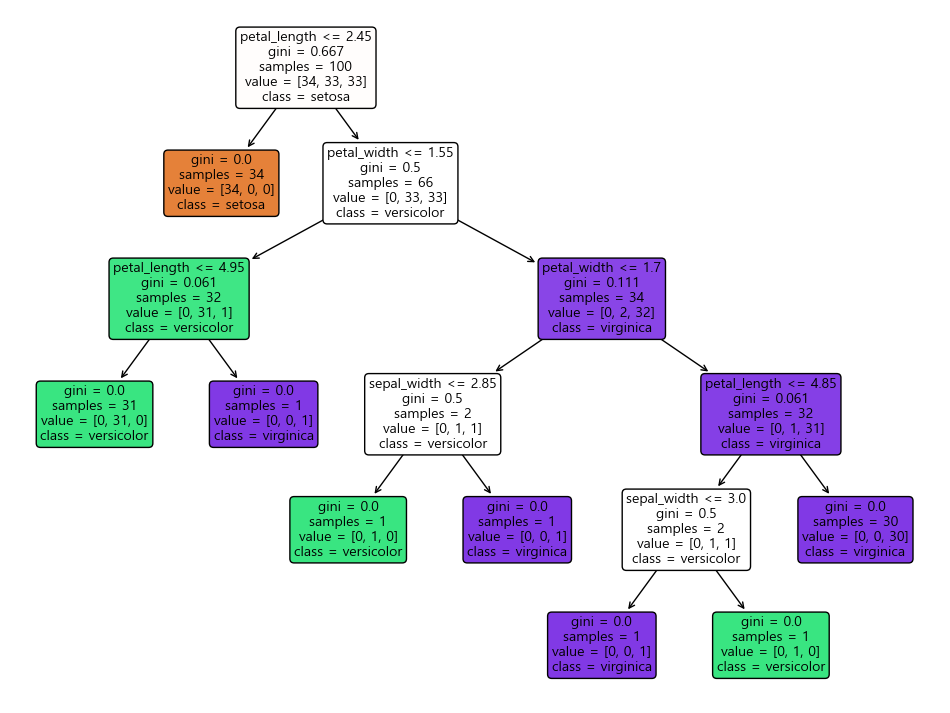

In [263]:
from sklearn import tree
plt.figure(figsize = (12,9))
tree.plot_tree(
    model,
    feature_names=X.columns,     # 입력 변수 이름
    class_names=df.species.unique(),        # 라벨 이름
    filled=True,                          # 노드 색상
    rounded=True,                         # 모서리 둥글게
    fontsize=10
)
plt.show()

# 모델 예측

In [252]:
y_pred = model.predict(X_test)

In [254]:
model.predict(np.array([[1,2,3,4]]))

C:\Users\pooko\anaconda3\envs\bibiml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

# 모델 평가

In [267]:
# 정확도 # 맞춘 갯수 / 총 갯수
acc = (y_pred == y_test).sum() / len(y_test)
acc
# 라이브러리 활용
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.94

In [269]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [271]:
accuracy_score(y_test, y_pred)

0.94

In [273]:
# 정확도만으로 모델을 평가할 수 있을까?
report = classification_report(y_test, y_pred, target_names = df.species.unique())
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.82      0.90        17
   virginica       0.85      1.00      0.92        17

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



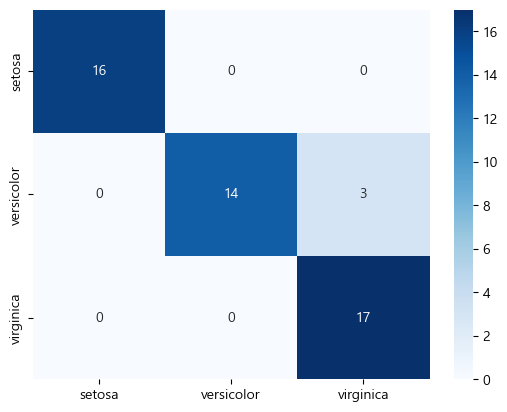

In [381]:
혼동행렬 = confusion_matrix(y_test, y_pred)
종_분류 = df.species.unique()
sns.heatmap(혼동행렬, annot=True, 
            xticklabels=종_분류, 
            yticklabels=종_분류, 
            cmap='Blues')

In [277]:
#

# 다양한 모델을 활용하는 방법

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = LogisticRegression()
model = KNeighborsClassifier()
model = SVC()
model = DecisionTreeClassifier()
model = RandomForestClassifier()
model = XGBClassifier()

# 모델 해석

In [351]:
df.columns[:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

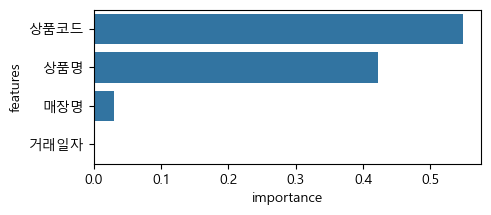

In [448]:
# 트리모델의 해석, feature importance
imp = model.feature_importances_
feature_names = df.columns[:4]
fi_df = pd.DataFrame({'features': feature_names,
                      'importance':imp}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(5,2))
sns.barplot(data=fi_df, x='importance', y='features')
plt.show()

# 모델의 변수별 중요도

In [303]:
import warnings
warnings.filterwarnings("ignore")

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X), 
                                                   feature_names=['sepal_len','sepal_wid','petal_len','petal_wid'], 
                                                   class_names=['setosa','versicolor','virginica'], 
                                                   discretize_continuous=True)
# 
i = 149
exp = explainer.explain_instance(X.iloc[i], model.predict_proba)
exp.show_in_notebook(show_table=True)


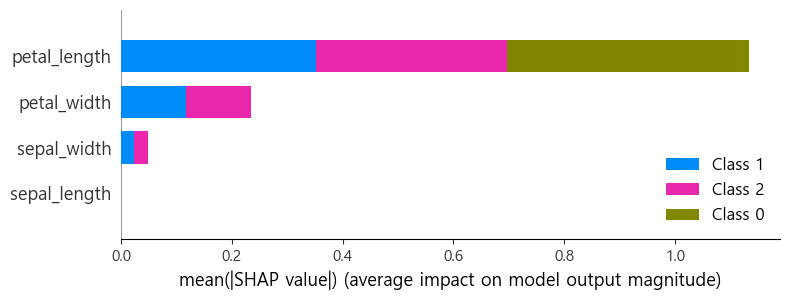

In [343]:
import shap
# 2️⃣ Explainer 및 SHAP 값
explainer = shap.Explainer(model, X)
shap_values = explainer(X, check_additivity=False)

# 3️⃣ 전역 중요도
shap.summary_plot(shap_values, X)

# 5️⃣ 개별 예측 해석 (예: 첫 번째 샘플, 첫 번째 클래스)
# shap.plots.waterfall(shap_values[1, :, 1])

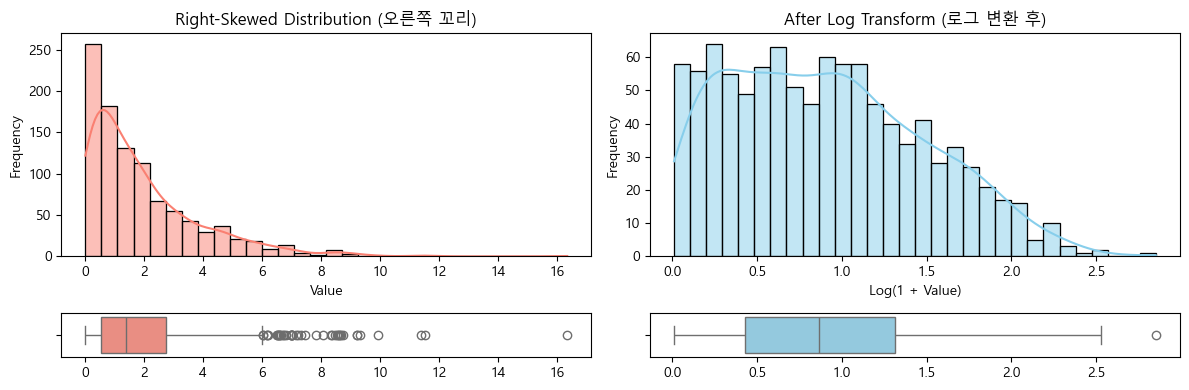

원본 왜도 (skewness): 1.865
로그변환 후 왜도 (skewness): 0.428


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# ---------------------------
# 1️⃣ 데이터 생성 (오른쪽으로 치우친 분포)
# ---------------------------
np.random.seed(42)
right_skewed = np.random.exponential(scale=2, size=1000)
log_transformed = np.log1p(right_skewed)  # log(1 + x)

# ---------------------------
# 2️⃣ 시각화 (GridSpec으로 높이 비율 조정)
# ---------------------------
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(2, 2, height_ratios=[4, 0.8])  # 🔹 히스토그램:박스플롯 = 3:1

axes = gs.subplots()

# 🔸 (1,1) 원본 히스토그램
sns.histplot(right_skewed, kde=True, color='salmon', bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Right-Skewed Distribution (오른쪽 꼬리)")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Frequency")

# 🔸 (1,2) 로그변환 히스토그램
sns.histplot(log_transformed, kde=True, color='skyblue', bins=30, ax=axes[0, 1])
axes[0, 1].set_title("After Log Transform (로그 변환 후)")
axes[0, 1].set_xlabel("Log(1 + Value)")
axes[0, 1].set_ylabel("Frequency")

# 🔸 (2,1) 원본 박스플롯
sns.boxplot(x=right_skewed, color='salmon', ax=axes[1, 0])
# axes[1, 0].set_title("Boxplot - Right-Skewed Data")
# axes[1, 0].set_xlabel("Value")

# 🔸 (2,2) 로그변환 박스플롯
sns.boxplot(x=log_transformed, color='skyblue', ax=axes[1, 1])
# axes[1, 1].set_title("Boxplot - After Log Transform")
# axes[1, 1].set_xlabel("Log(1 + Value)")

plt.tight_layout()
plt.show()

# ---------------------------
# 3️⃣ 왜도 비교 출력
# ---------------------------
print(f"원본 왜도 (skewness): {skew(right_skewed):.3f}")
print(f"로그변환 후 왜도 (skewness): {skew(log_transformed):.3f}")


<Axes: >

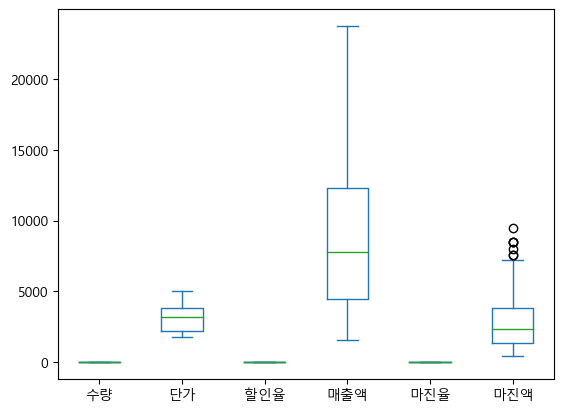

In [63]:
df.plot.box()

# 결측치 대체

In [384]:
df = pd.read_csv('매출데이터.csv')

In [386]:
# df.info()

In [388]:
df.isnull().sum()  # 결측치 확인
df.fillna(0)       # 0으로 결측값 대체  # df.fillna(df.mean())

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0
4,2024-03-11,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0,3800,0.10,6840.0,0.33,2257.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-02-25,명동점,P1007,그릭요거트,C1896,남,40대,모바일페이,4.0,3800,0.05,14440.0,0.33,4765.2
196,2025-02-26,강남점,P1004,통밀 식빵,C8696,남,50대,카드,4.0,3500,0.00,14000.0,0.28,3920.0
197,2025-02-27,명동점,P1003,저지방 우유,C2047,남,20대,모바일페이,2.0,2200,0.00,4400.0,0.25,1100.0
198,2025-02-28,홍대점,P1008,오트밀,C8563,여,60대,모바일페이,3.0,3200,0.05,9120.0,0.30,2736.0


In [410]:
df.head(5)

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0
4,2024-03-11,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0,3800,0.10,6840.0,0.33,2257.2


In [412]:
pd.get_dummies(df, columns=['매장명','상품명','성별','연령대','결제수단'], drop_first=True)

,거래일자,상품코드,고객ID,수량,단가,할인율,매출액,마진율,마진액,매장명_명동점,...,상품명_유기농 사과,상품명_저지방 우유,상품명_통밀 식빵,성별_여,연령대_30대,연령대_40대,연령대_50대,연령대_60대,결제수단_카드,결제수단_현금
0,2024-03-03,P1009,C5447,3.0,1800,0.00,5400.0,0.28,1512.0,True,...,False,False,False,True,False,False,False,True,False,True
1,2024-03-04,P1005,C9831,3.0,4000,0.10,10800.0,0.32,3456.0,False,...,False,False,False,True,False,False,False,False,False,False
2,2024-03-07,P1006,C3202,4.0,5000,0.15,17000.0,0.40,6800.0,False,...,False,False,False,True,False,False,True,False,False,False
3,2024-03-11,P1003,C1239,5.0,2200,0.10,9900.0,0.25,2475.0,True,...,False,True,False,True,False,False,True,False,False,True
4,2024-03-11,P1007,C9368,2.0,3800,0.10,6840.0,0.33,2257.2,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-02-25,P1007,C1896,4.0,3800,0.05,14440.0,0.33,4765.2,True,...,False,False,False,False,False,True,False,False,False,False
196,2025-02-26,P1004,C8696,4.0,3500,0.00,14000.0,0.28,3920.0,False,...,False,False,True,False,False,False,True,False,True,False
197,2025-02-27,P1003,C2047,2.0,2200,0.00,4400.0,0.25,1100.0,True,...,False,True,False,False,False,False,False,False,False,False
198,2025-02-28,P1008,C8563,3.0,3200,0.05,9120.0,0.30,2736.0,False,...,False,False,False,True,False,False,False,True,False,False


In [416]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
label_enc.fit_transform(df['연령대'])

array([4, 0, 3, 3, 3, 2, 3, 0, 4, 2, 2, 2, 5, 3, 3, 2, 1, 3, 3, 0, 1, 2,
       0, 4, 0, 3, 3, 3, 2, 2, 1, 1, 4, 3, 0, 0, 0, 0, 0, 4, 2, 2, 4, 2,
       2, 4, 4, 3, 0, 2, 1, 1, 2, 2, 3, 4, 1, 1, 1, 4, 3, 4, 1, 1, 2, 0,
       1, 2, 0, 4, 1, 4, 4, 4, 0, 0, 2, 4, 0, 3, 4, 4, 4, 2, 4, 3, 1, 1,
       1, 0, 0, 2, 1, 3, 2, 4, 3, 0, 4, 2, 2, 1, 2, 2, 1, 4, 1, 2, 4, 4,
       4, 3, 2, 3, 3, 4, 1, 2, 3, 3, 2, 3, 0, 2, 2, 3, 2, 3, 1, 1, 2, 1,
       3, 3, 4, 0, 3, 1, 4, 2, 1, 0, 3, 3, 2, 2, 2, 1, 3, 0, 0, 4, 2, 2,
       2, 1, 1, 1, 3, 3, 1, 1, 4, 3, 2, 4, 0, 2, 2, 1, 3, 2, 2, 3, 4, 0,
       1, 2, 2, 1, 0, 0, 2, 4, 1, 1, 1, 0, 0, 4, 5, 0, 0, 0, 0, 2, 3, 0,
       4, 0])

In [444]:
mapping = label_enc.classes_ 
mapping = dict(zip(mapping, range(len(mapping))))
mapping

{'20대': 0, '30대': 1, '40대': 2, '50대': 3, '60대': 4, nan: 5}

In [446]:
df['연령대_enc'] = label_enc.fit_transform(df['연령대'])
df

,거래일자,매장명,상품코드,상품명,고객ID,성별,연령대,결제수단,수량,단가,할인율,매출액,마진율,마진액,연령대_enc
0,2024-03-03,명동점,P1009,유기농 당근,C5447,여,60대,현금,3.0,1800,0.00,5400.0,0.28,1512.0,4
1,2024-03-04,홍대점,P1005,닭가슴살팩,C9831,여,20대,모바일페이,3.0,4000,0.10,10800.0,0.32,3456.0,0
2,2024-03-07,강남점,P1006,블루베리,C3202,여,50대,모바일페이,4.0,5000,0.15,17000.0,0.40,6800.0,3
3,2024-03-11,명동점,P1003,저지방 우유,C1239,여,50대,현금,5.0,2200,0.10,9900.0,0.25,2475.0,3
4,2024-03-11,강남점,P1007,그릭요거트,C9368,남,50대,모바일페이,2.0,3800,0.10,6840.0,0.33,2257.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-02-25,명동점,P1007,그릭요거트,C1896,남,40대,모바일페이,4.0,3800,0.05,14440.0,0.33,4765.2,2
196,2025-02-26,강남점,P1004,통밀 식빵,C8696,남,50대,카드,4.0,3500,0.00,14000.0,0.28,3920.0,3
197,2025-02-27,명동점,P1003,저지방 우유,C2047,남,20대,모바일페이,2.0,2200,0.00,4400.0,0.25,1100.0,0
198,2025-02-28,홍대점,P1008,오트밀,C8563,여,60대,모바일페이,3.0,3200,0.05,9120.0,0.30,2736.0,4
